In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense


## Загружаем данные, проверяем на пропуски

In [2]:
## load data
ds= pd.read_csv('.\\ds_it\\ebw_data.csv', delimiter=',')
ds.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [3]:
ds.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [4]:
ds.isna().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

In [5]:
print(ds.IW.unique())
print(ds.IF.unique())
print(ds.VW.unique())
print(ds.FP.unique())

[47 45 46 48 49 44 43]
[139 140 141 134 131 132 146 150]
[ 4.5  8.  10.  12.   9. ]
[ 80 110 125  60  50]


## Строим графики зависимости, проверяем распределения

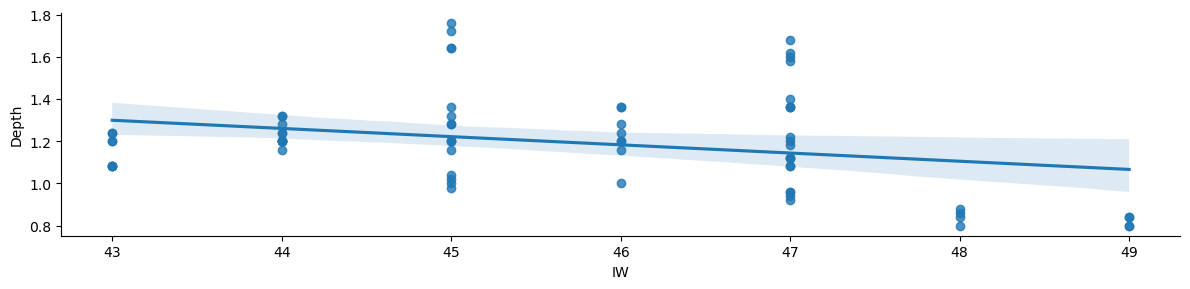

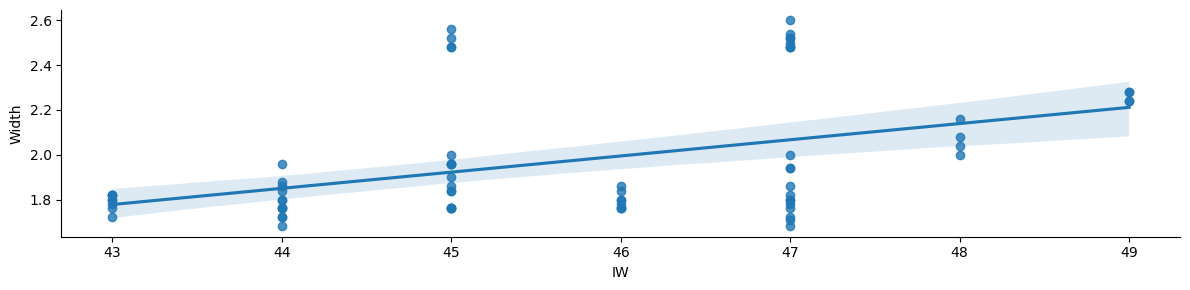

In [6]:
sns.lmplot(data = ds, x="IW", y="Depth", aspect = 4, height = 3)
sns.lmplot(data = ds, x="IW", y="Width", aspect = 4, height = 3)
plt.show()

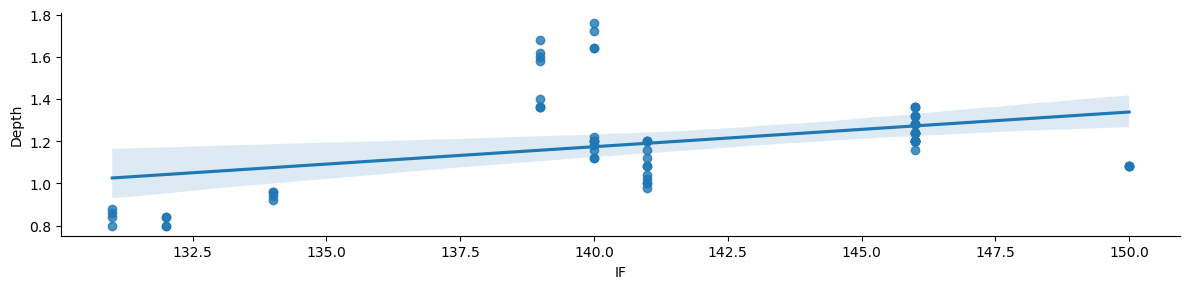

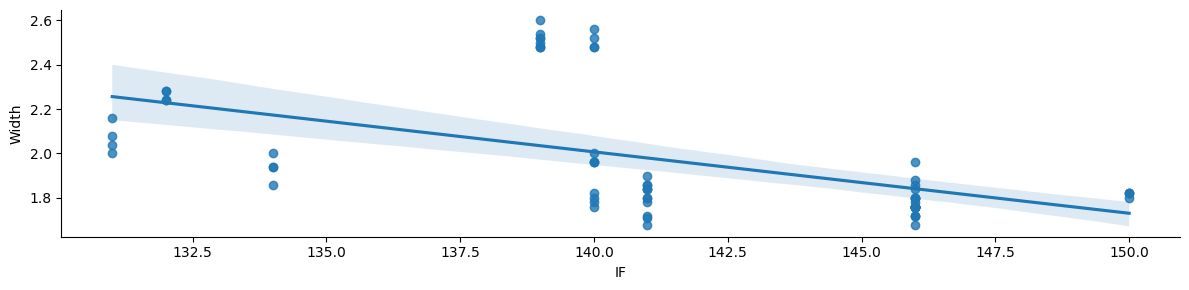

In [7]:
sns.lmplot(data = ds, x="IF", y="Depth", aspect = 4, height = 3)
sns.lmplot(data = ds, x="IF", y="Width", aspect = 4, height = 3)
plt.show()

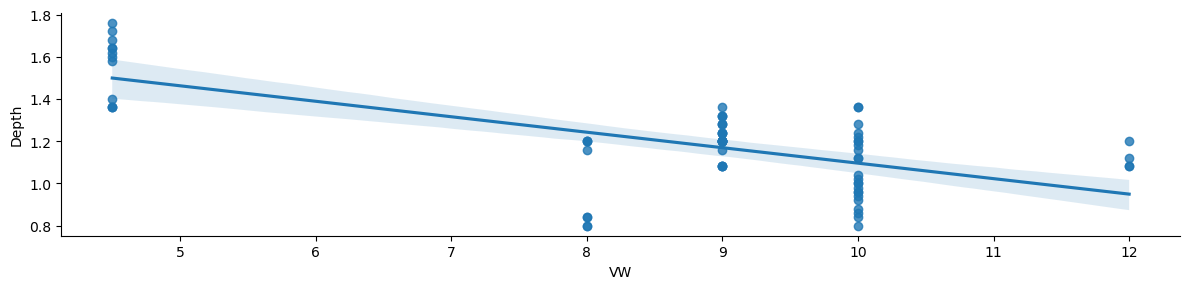

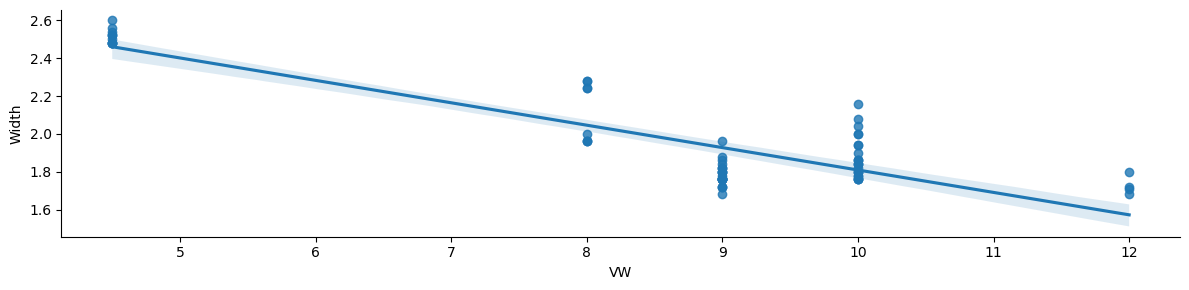

In [8]:
sns.lmplot(data = ds, x="VW", y="Depth", aspect = 4, height = 3)
sns.lmplot(data = ds, x="VW", y="Width", aspect = 4, height = 3)
plt.show()

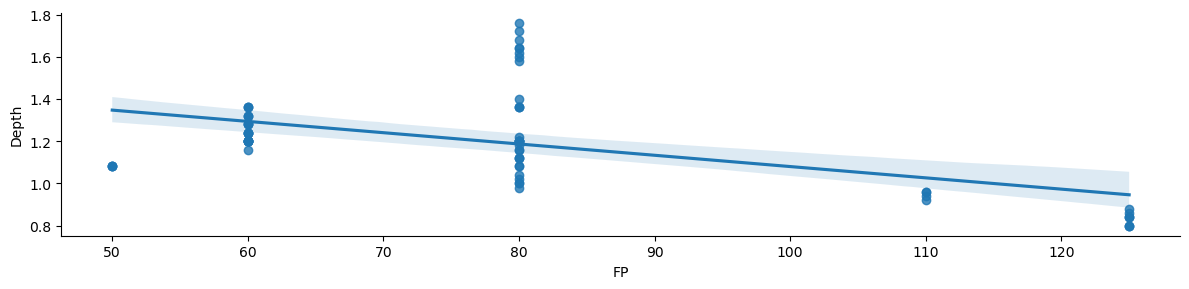

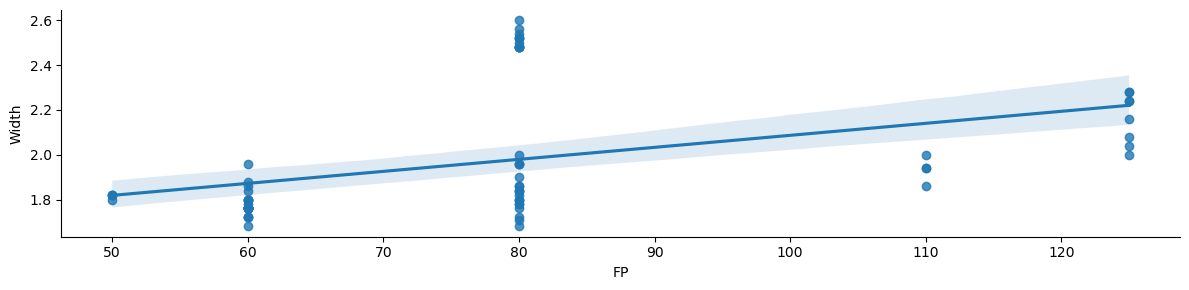

In [9]:
sns.lmplot(data = ds, x="FP", y="Depth", aspect = 4, height = 3)
sns.lmplot(data = ds, x="FP", y="Width", aspect = 4, height = 3)
plt.show()

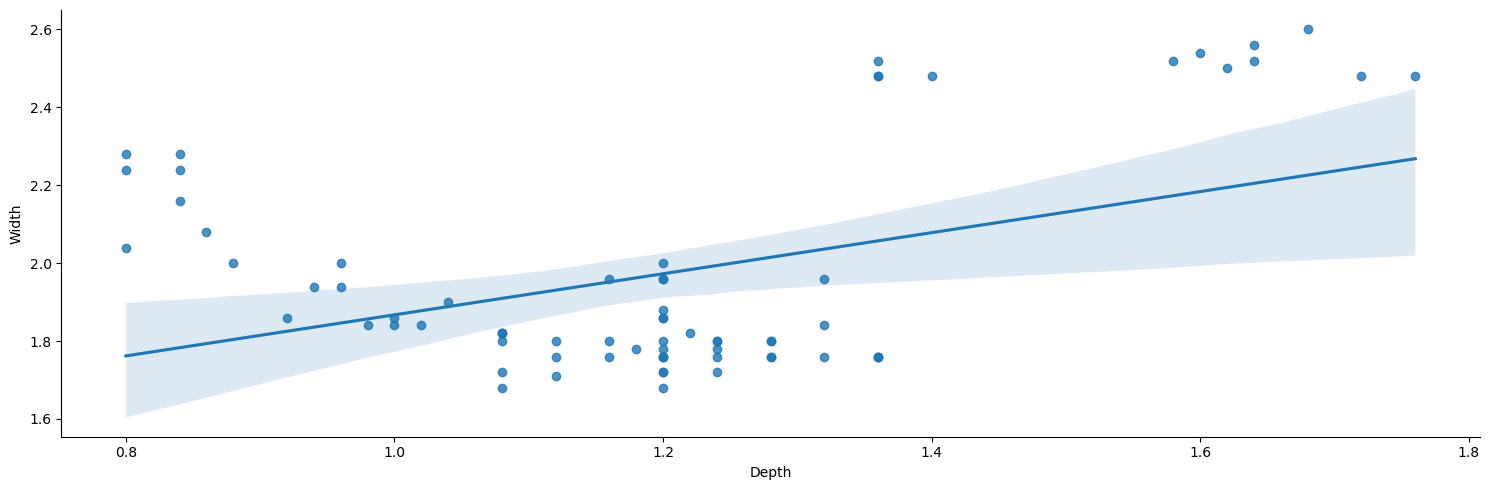

In [10]:
sns.lmplot(data = ds, x="Depth", y="Width", aspect = 3, height = 5)
plt.show()

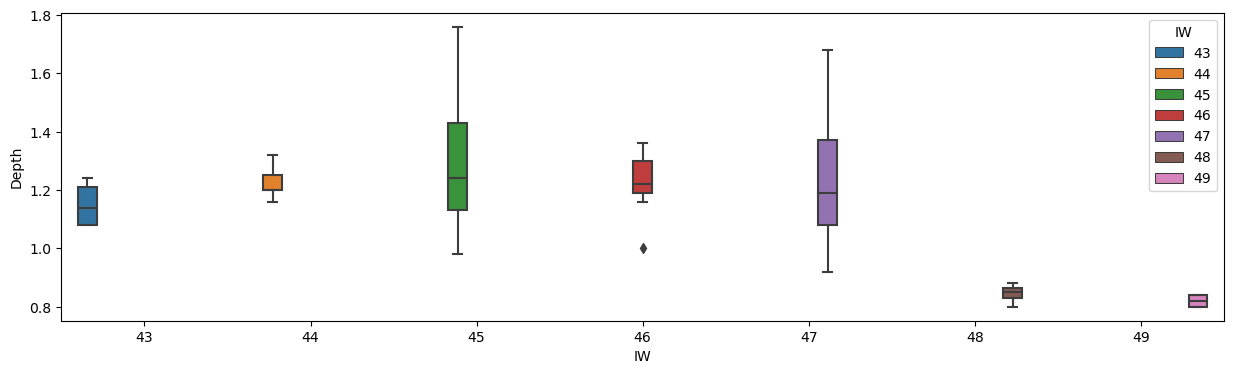

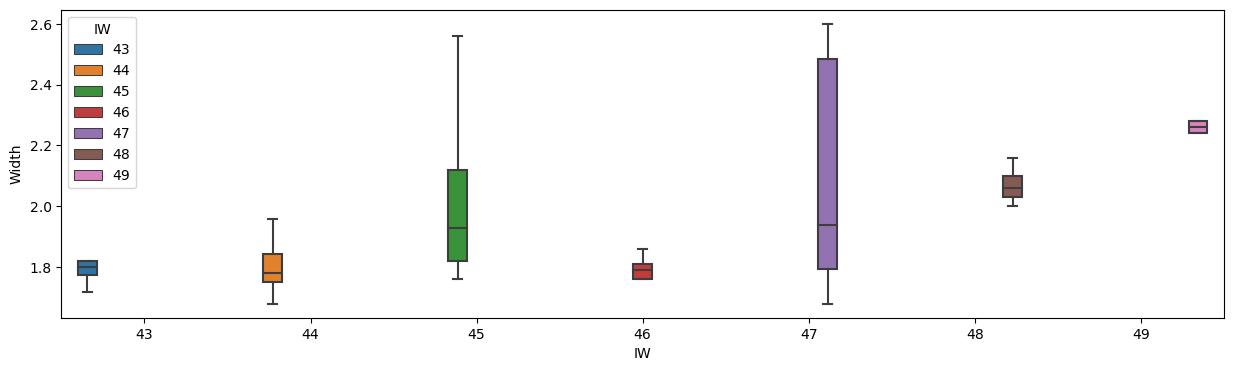

In [11]:
plt.figure(figsize=(15,4))
sns.boxplot(data = ds, x="IW", y="Depth", hue="IW")
plt.show()
plt.figure(figsize=(15,4))
sns.boxplot(data = ds, x="IW", y="Width", hue="IW")
plt.show()

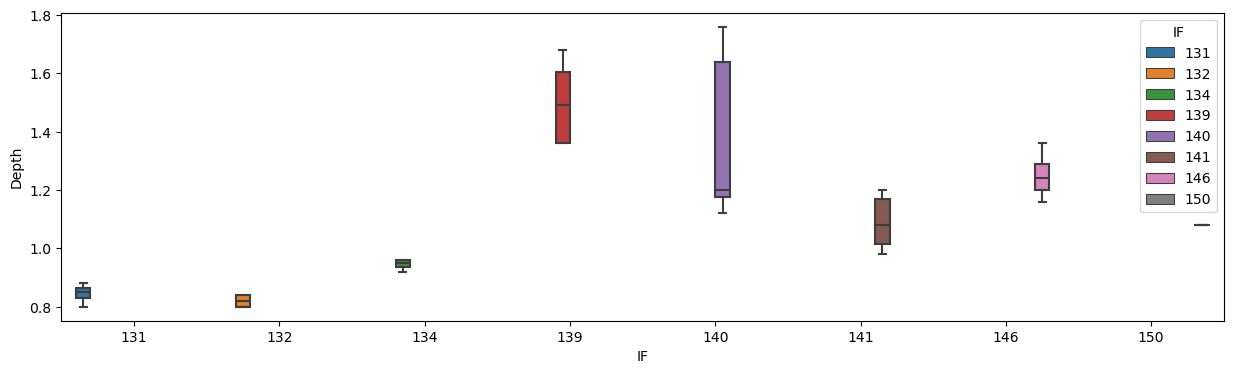

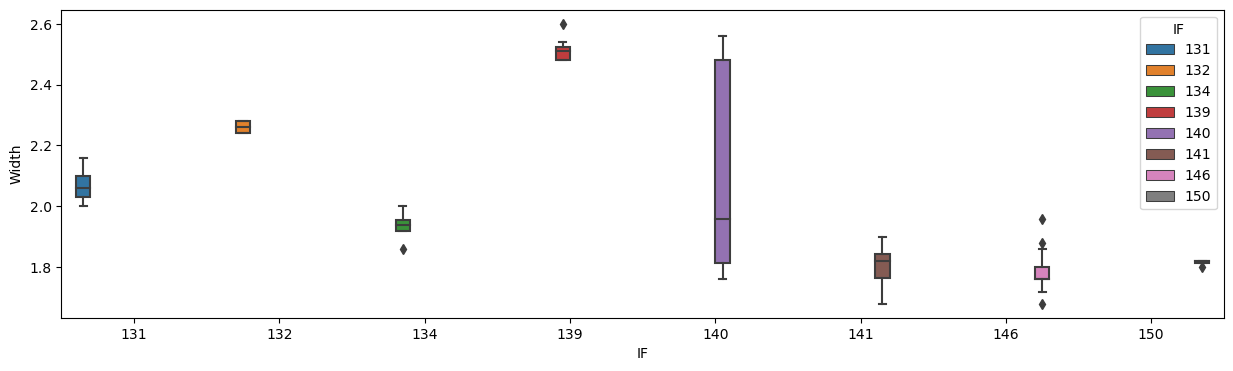

In [12]:
plt.figure(figsize=(15,4))
sns.boxplot(data = ds, x="IF", y="Depth", hue="IF")
plt.show()
plt.figure(figsize=(15,4))
sns.boxplot(data = ds, x="IF", y="Width", hue="IF")
plt.show()

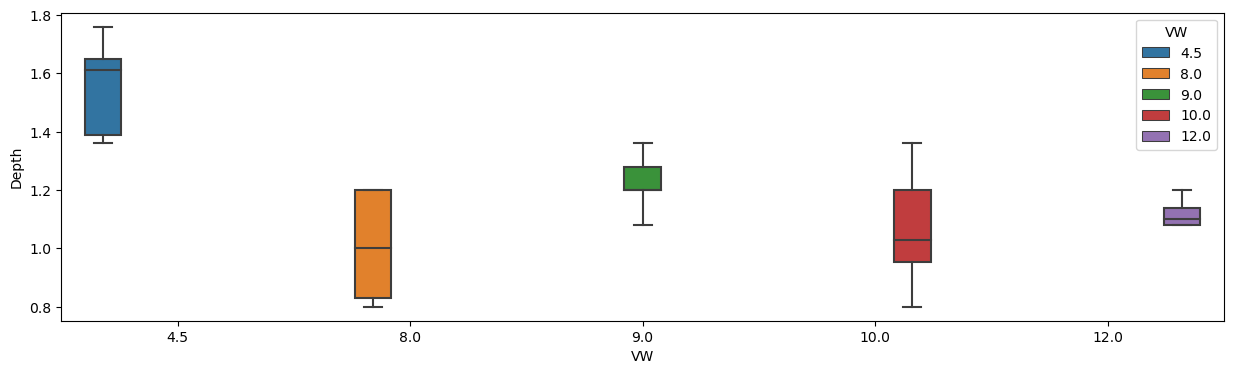

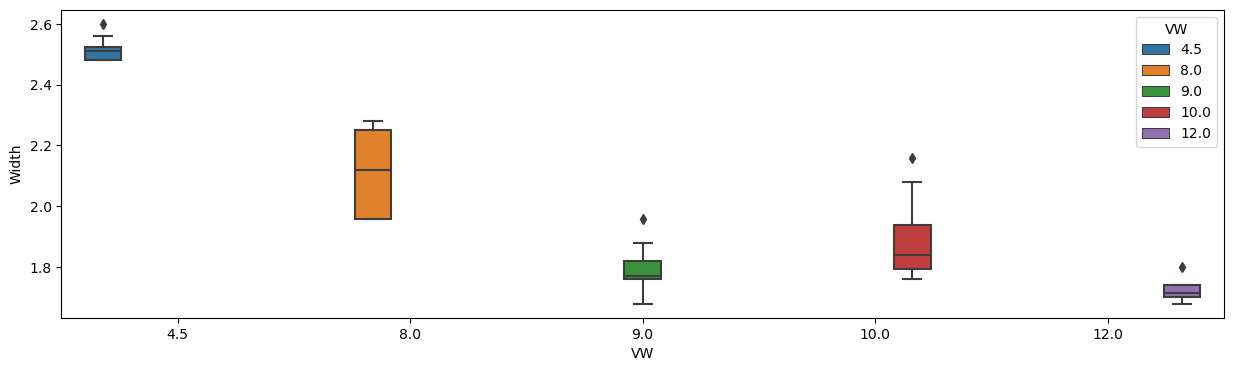

In [13]:
plt.figure(figsize=(15,4))
sns.boxplot(data = ds, x="VW", y="Depth", hue="VW")
plt.show()
plt.figure(figsize=(15,4))
sns.boxplot(data = ds, x="VW", y="Width", hue="VW")
plt.show()

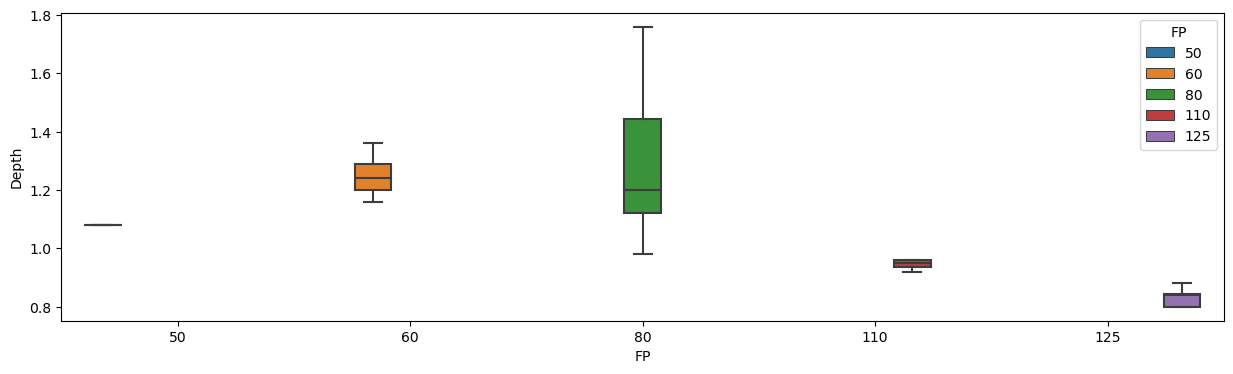

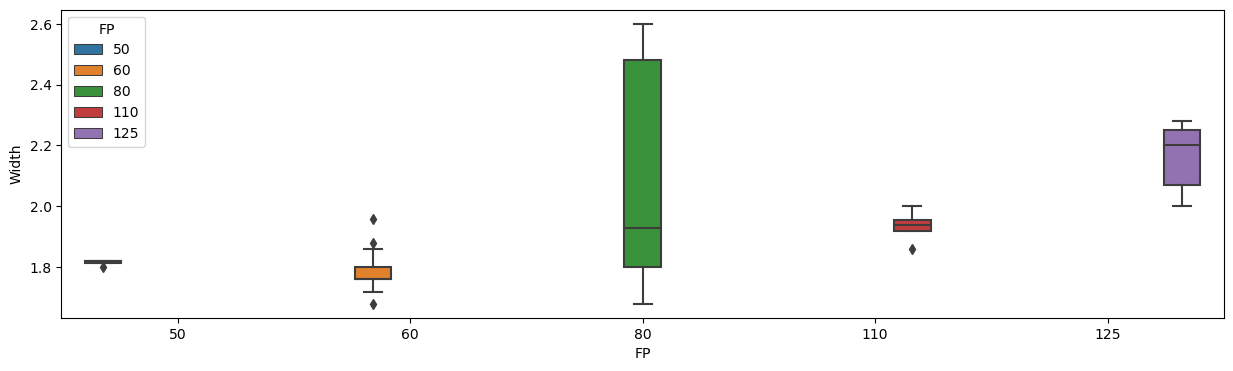

In [14]:
plt.figure(figsize=(15,4))
sns.boxplot(data = ds, x="FP", y="Depth", hue="FP")
plt.show()
plt.figure(figsize=(15,4))
sns.boxplot(data = ds, x="FP", y="Width", hue="FP")
plt.show()

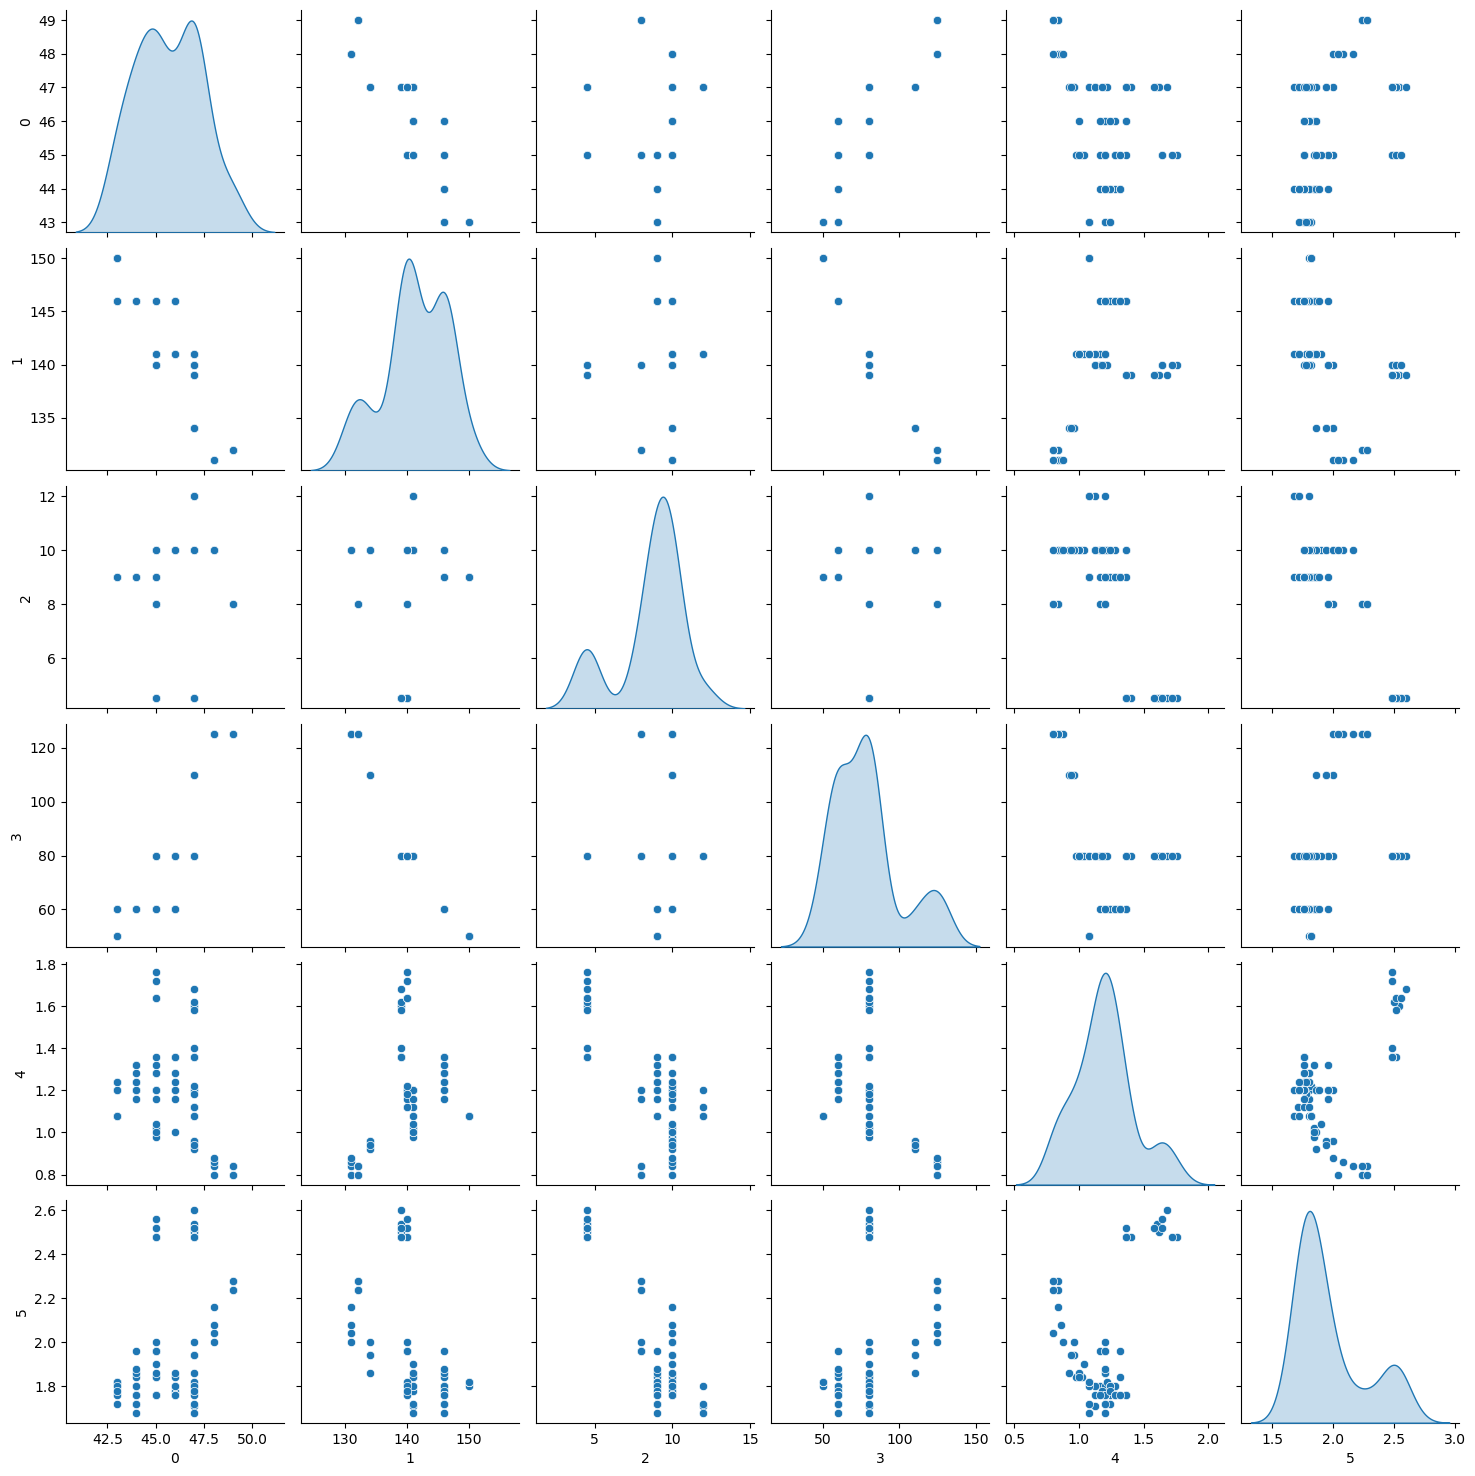

In [15]:
X = ds[["IW", "IF", "VW", "FP"]].values
y = ds[["Depth", "Width"]].values

sns.pairplot(pd.DataFrame(np.column_stack([X, y])), diag_kind='kde')

## Нейронная сеть

In [16]:
scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(50, input_dim=n_inputs, activation='relu')) ##, kernel_initializer='he_uniform'
    model.add(Dense(25, activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(optimizer='adam', loss='mae') ##, metrics=['accuracy']
    return model

In [19]:
model = get_model(4, 2)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 2)                 52        
                                                                 
Total params: 1,577
Trainable params: 1,577
Non-trainable params: 0
_________________________________________________________________


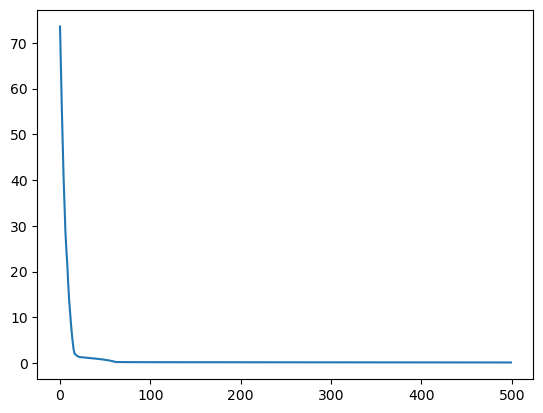

In [20]:
hist = model.fit(X, y, verbose=0, epochs=500)##, batch_size=16, validation_data=(X_test, y_test))
df = pd.DataFrame(hist.history)
plt.plot(df)

In [21]:
nn_y = model.predict(X_test)

1/1 [==============================] - 0s 167ms/step


In [22]:
print(metrics.r2_score(y_test, nn_y))
print(metrics.mean_squared_log_error(y_test, nn_y))

0.3038797209715335
0.006257734507980411


In [23]:
# сохраняем модель сети для последующего использования
model.save('ds_it_model')

INFO:tensorflow:Assets written to: ds_it_model\assets


INFO:tensorflow:Assets written to: ds_it_model\assets


## Стохастический градиентный спуск

In [28]:
y_depth = ds.Depth
y_width = ds.Width

reg_depth = make_pipeline(preprocessing.StandardScaler(),
                    SGDRegressor(max_iter=10000))
reg_depth.fit(X, y_depth)

reg_width = make_pipeline(preprocessing.StandardScaler(),
                    SGDRegressor(max_iter=10000))
reg_width.fit(X, y_width)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=10000))])

In [29]:
sgd_depth_y = reg_depth.predict(X_test)
sgd_width_y = reg_width.predict(X_test)

In [30]:
y_depth_test = y_test[:,0]
y_width_test = y_test[:,1]


In [31]:
print(metrics.r2_score(y_depth_test, sgd_depth_y))
print(metrics.mean_squared_log_error(y_depth_test, sgd_depth_y))
print(metrics.r2_score(y_width_test, sgd_width_y))
print(metrics.mean_squared_log_error(y_width_test, sgd_width_y))

0.6312681431301
0.0032918984218721515
0.8447652223555453
0.0007574531108860314


## Xgboost

In [35]:
import xgboost as xgb

In [36]:
model_xgb = xgb.XGBRegressor()#booster='gbtree')
model_xgb.fit(X, y)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [37]:
xgb_y = model_xgb.predict(X_test)

print(xgb_y)
print(y_test)

print(metrics.r2_score(y_test, xgb_y))
print(metrics.mean_squared_log_error(y_test, xgb_y))


[[0.8448209  2.0699167 ]
 [1.1398017  1.8199487 ]
 [0.82022876 2.259486  ]
 [1.0804164  1.814586  ]
 [1.0106568  1.8588785 ]
 [1.0106568  1.8588785 ]
 [1.230046   1.794849  ]
 [1.6893378  2.509449  ]
 [1.1896417  1.9702626 ]
 [1.230046   1.794849  ]
 [0.94552624 1.9353166 ]
 [1.2200878  1.7659159 ]
 [1.3091741  1.7701423 ]
 [1.0804164  1.814586  ]
 [1.3097578  1.7608018 ]]
[[0.88 2.  ]
 [1.2  1.86]
 [0.8  2.24]
 [1.08 1.82]
 [1.02 1.84]
 [1.04 1.9 ]
 [1.2  1.72]
 [1.72 2.48]
 [1.2  1.96]
 [1.24 1.8 ]
 [0.94 1.94]
 [1.2  1.72]
 [1.28 1.8 ]
 [1.08 1.82]
 [1.32 1.76]]
0.9769380406097727
0.0001450476768517941


## RandomForest

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf = RandomForestRegressor()
rf.fit(X, y)
rf_y = rf.predict(X_test)

In [40]:
print(rf_y)
print(y_test)

print(metrics.r2_score(y_test, rf_y))
print(metrics.mean_squared_log_error(y_test, rf_y))

[[0.84417643 2.07144317]
 [1.13629571 1.81964833]
 [0.81982286 2.25342571]
 [1.08554    1.8138754 ]
 [1.01058437 1.86076833]
 [1.01058437 1.86076833]
 [1.22867871 1.79376699]
 [1.6855181  2.51071238]
 [1.18949238 1.96924238]
 [1.22867871 1.79376699]
 [0.94946995 1.93840177]
 [1.22053238 1.7686798 ]
 [1.31312889 1.76983079]
 [1.08554    1.8138754 ]
 [1.31174    1.76      ]]
[[0.88 2.  ]
 [1.2  1.86]
 [0.8  2.24]
 [1.08 1.82]
 [1.02 1.84]
 [1.04 1.9 ]
 [1.2  1.72]
 [1.72 2.48]
 [1.2  1.96]
 [1.24 1.8 ]
 [0.94 1.94]
 [1.2  1.72]
 [1.28 1.8 ]
 [1.08 1.82]
 [1.32 1.76]]
0.9760490611861259
0.00015238734100384656


In [42]:
import joblib

joblib.dump(rf, "vpr_random_forest.joblib")

['vpr_random_forest.joblib']

In [43]:
print(X_test)

[[ 48.  131.   10.  125. ]
 [ 46.  141.   10.   80. ]
 [ 49.  132.    8.  125. ]
 [ 43.  150.    9.   50. ]
 [ 45.  141.   10.   80. ]
 [ 45.  141.   10.   80. ]
 [ 44.  146.    9.   60. ]
 [ 45.  140.    4.5  80. ]
 [ 45.  140.    8.   80. ]
 [ 44.  146.    9.   60. ]
 [ 47.  134.   10.  110. ]
 [ 43.  146.    9.   60. ]
 [ 46.  146.   10.   60. ]
 [ 43.  150.    9.   50. ]
 [ 45.  146.    9.   60. ]]
